# 1.지역별 누적 확진자 수 파이 그래프
# 지역별, 6월 30일 기준, 최종 누적확진자 (TimeProvince, 파이그래프)
# 전체 확진자 수, 지역별 확진자 수, 지역별 비율
# 대한민국 내 전체 확진자 중 지역별 지분 대한 정보 식별 가능

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint as pp
from inspect import signature as sig

df_timeProvince = pd.read_csv('./DataScienceforCOVID19/TimeProvince.csv')

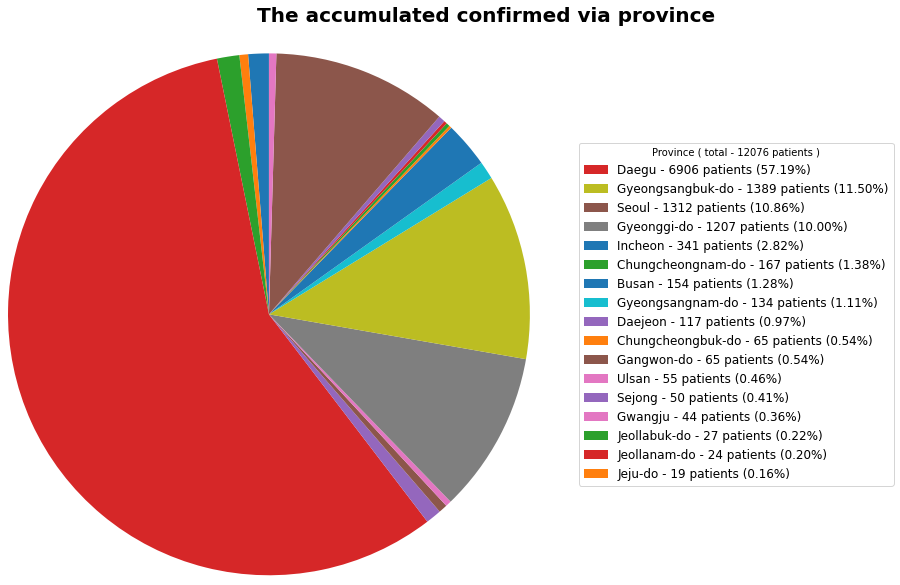

In [13]:
sizes = df_timeProvince.groupby('province')['confirmed'].max() # 지역별 누적확진자 값 중 2020년 6월 30일 기준값들만 가져옴
labels_data = sizes.index # 지역별로 groupby했기 때문에 이때의 index는 지역명이됨
data = sizes.values # 지역별 2020년 6월 30일 기준 누적확진자들의 값이 담김

x = labels_data # 파이 그래프에 들어갈 범례
y = data  # 파이 그래프에서 공간을 차지할 값

porcent = 100.*(y/y.sum()) # 전체 중 해당 값이 차지하는 비율 ( 소숫점으로 나오기 떄문에 100을 곱함 ==> 100.0 * (해당 데이터 / 전체 누적확진자)

patches, texts = plt.pie(y, startangle=90, radius=3) 

labels =  ['{0} - {1} patients ({2:1.2f}%)'.format(i, k, j) for i,k, j in zip(x, y, porcent)] # x, y, porcent를 한 행으로 만들어서 뽑아 범례 속 내용을 생성
sort_legend = True # 범례 정렬

if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y), key=lambda x: x[2],reverse=True))  # 차지 비율이 높은 순서로 정렬
    pass

titles = 'Province ( total - {} patients )'.format(data.sum()) # 범례 제목과 전체 확진자 수 입력을 위해 생성한 문자
    
plt.legend(patches, labels, loc=7, bbox_to_anchor=(3.4, 0.5), fontsize=12, title=titles) # 범례 설정
plt.title("The accumulated confirmed via province", weight='bold', size=20, fontdict={'verticalalignment': 'bottom', 'horizontalalignment': 'center'}, position=(1.5,1.8)) # 그래프 제목 설정
# plt.show()
# plt.savefig('지역별_6월30일기준_누적확진자_파이그래프', bbox_inches='tight') # 그림파일로 그래프를 저장함